# RoadRunner transit model example III - LDTk-based limb darkening

*Author:* Hannu Parviainen<br>
*Last modified:* 23 April 2024

The *LDTk limb darkening model*, `pytransit.LDTkLDModel` (or just *LDTkM*), works as an example of a more complex limb darkening model that is best implemented as a subclass of `pytransit.LDModel`. The *LDTk limb darkening model* uses [*LDTk*](https://github.com/hpparvi/ldtk) to create a set of stellar limb darkening profile samples given the stellar $T_\mathrm{Eff}$, $\log g$, and metallicity with their uncertainties, and uses the profiles directly to calculate the transit. The profiles are created from the PHOENIX-calculated *specific intensity spectra* by Husser (2013), and the model completely avoids approximating the limb darkening profile with an analytical function.

This notebook shows how to use *LDTkM* with RoadRunner, but the main use case for the model is in transmission spectroscopy when combined with the `pytransit.TSModel` transmission spectroscopy transit model. This is because, when using LDTkLDModel, The limb darkening model is always evaluated using ($T_\mathrm{Eff}$, $\log g$, and metallicity), and **the number of limb darkening parameters is independent of the number of passbands.** This makes it especially useful for transmission spectroscopy where you may need to model tens of passbands simultaneously. 

In [1]:
%matplotlib inline

from matplotlib.pyplot import plot, subplots, setp
from matplotlib import rc
from numpy.random import normal, uniform
from numpy import arange, array, ndarray, linspace, pi, repeat, tile, zeros

rc('figure', figsize=(13,5))

In [2]:
def plot_lc(time, flux, c=None, ylim=(0.9865, 1.0025), ax=None, alpha=1):
    if ax is None:
        fig, ax = subplots()
    else:
        fig, ax = None, ax
    ax.plot(time, flux, c=c, alpha=alpha)
    ax.autoscale(axis='x', tight=True)
    setp(ax, xlabel='Time [d]', ylabel='Flux', xlim=time[[0,-1]], ylim=ylim)
    
    if fig is not None:
        fig.tight_layout()
    return ax

## Import the model

First, we import the ``RoadRunnerModel`` and ``LDTkLDModel`` and some simple transmission functions from *LDTk*.

In [3]:
from pytransit import RoadRunnerModel, LDTkLDModel
from ldtk import sdss_g, sdss_r, sdss_i, sdss_z

In [4]:
time = linspace(-0.05, 0.05, 1500)

## Example 1: single passband

The *LDTkLDModel* is initialised by giving it the stellar parameters and passband transmission functions,

In [5]:
ldm = LDTkLDModel(teff=(5500, 150), logg=(4.5, 0.1), metal=(0.0, 0.1), pbs=[sdss_i], dataset='visir-lowres')

and given to the ``RoadRunnnerModel`` as any other limb darkening model.

In [6]:
tm = RoadRunnerModel(ldm)
tm.set_data(time)

after which the transit model evaluation goes as usual

In [7]:
flux1 = tm.evaluate(k=0.1, ldc=[5205, 4.47, 0.03], t0=0.0, p=1.0, a=4.2, i=0.5*pi, e=0.0, w=0.0)

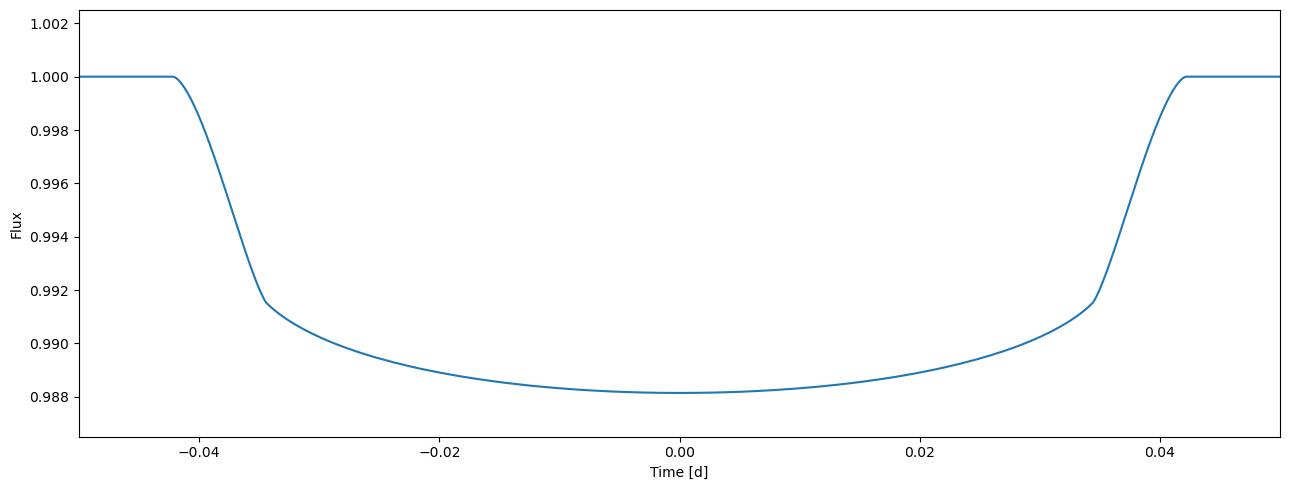

In [8]:
plot_lc(time, flux1);

## Example 2: multiple passbands 

In [9]:
ldm = LDTkLDModel([sdss_g, sdss_z], teff=(5500, 150), logg=(4.5, 0.1), metal=(0.0, 0.1), dataset='visir-lowres')

In [10]:
lcids = zeros(time.size, int)
lcids[time.size//2:] = 1

In [11]:
tm = RoadRunnerModel(ldm)
tm.set_data(time, lcids=lcids, pbids=[0,1])

In [12]:
flux1 = tm.evaluate(k=0.1, ldc=[5205, 4.47, 0.03], t0=0.0, p=1.0, a=4.2, i=0.5*pi, e=0.0, w=0.0)

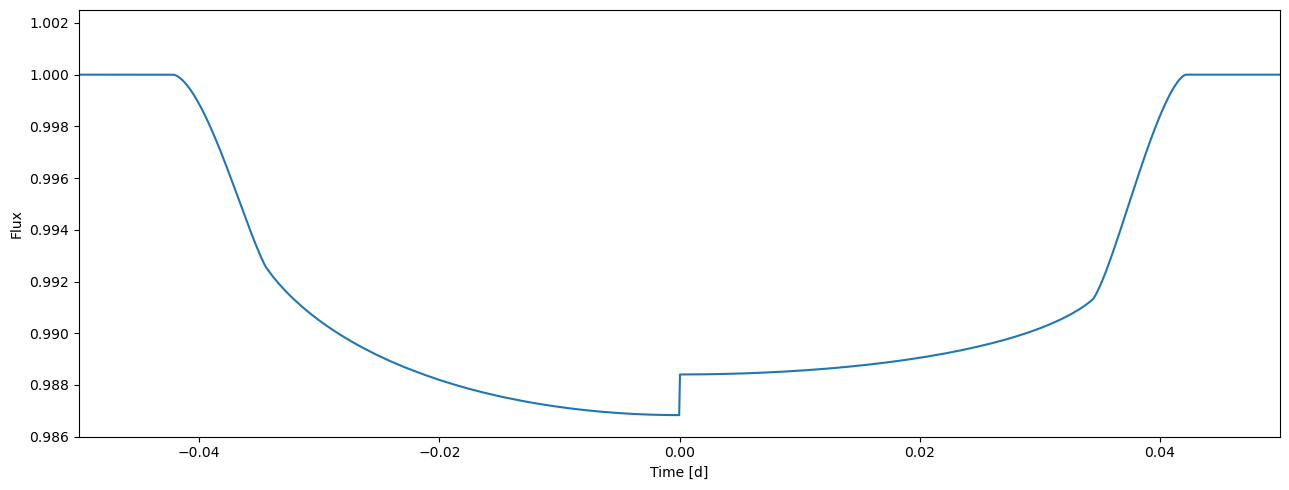

In [13]:
plot_lc(time, flux1, ylim=(0.986, 1.0025));

---

<center>©2024 Hannu Parviainen</center>